# 가끔 데이터 확인하는 용도

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

from sklearn.preprocessing import MinMaxScaler

# 맥에서 글씨 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 4. GDP와 target의 상관성 분석

In [7]:
df = pd.read_csv('../data/preprocessed/18_trading_activity.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_14218/1772266644.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/preprocessed/18_trading_activity.csv')


In [8]:
df.shape

(1128094, 91)

In [9]:
print(len(df.columns))
df.columns

91


Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60이하)',
       'k-전용면적별세대현황(60~85이하)', 'k-85~135이하', 'k-135초과', 'k-홈페이지', 'k-등록일자',
       'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수',
       '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y',
       '단지신청일', 'target', 'is_test', '시군구 번지', '좌표X,좌표Y', '가장 가까운 거리', 'index',
       '역사_ID', '역사명', '호선', '위도', '경도', '인근 지하철 역 개수', '가장 가까운 버스 정류장 거리',
       '가장 가까운 버스 정류장 index', '가장 가까운 버스 정류장 노드 ID', '가장 가까운 버스 정류소번호',
       '가장 가까운 버스 정류소명', '가장 가까운 버스 정류소 타입', '가장 가까운 버스 정류장 X좌표',
       '가장 가까운 버스 정류장 Y좌표', '인근 버스 정류장 개수', '계약년', '계약월', 'GDP', '한국은행 기준금리',
       '기대 인플레이션', '지가지수', '아파트

In [10]:
target_df = df.groupby('계약년월')[['target']].mean().reset_index().iloc[:198]
target_df

,계약년월,target
0,200701,27907.070115
1,200702,28687.696452
2,200703,26188.014682
3,200704,29135.020486
4,200705,32721.145273
...,...,...
193,202302,98699.860181
194,202303,101508.679474
195,202304,105340.274426
196,202305,108825.542857


In [11]:
gdp_df = df.groupby('계약년월')[['GDP']].mean().reset_index().iloc[:198]
gdp_df

,계약년월,GDP
0,200701,1172464.5
1,200702,1172464.5
2,200703,1172464.5
3,200704,1172464.5
4,200705,1172464.5
...,...,...
193,202302,1712792.9
194,202303,1712792.9
195,202304,1712792.9
196,202305,1712792.9


### 스케일링

In [12]:
target_scaler = MinMaxScaler()
gdp_scaler = MinMaxScaler()

target_df['target'] = target_scaler.fit_transform(target_df[['target']])
gdp_df['GDP'] = gdp_scaler.fit_transform(gdp_df[['GDP']])

In [13]:
target_df

,계약년월,target
0,200701,0.019178
1,200702,0.027886
2,200703,0.000000
3,200704,0.032877
4,200705,0.072883
...,...,...
193,202302,0.808936
194,202303,0.840271
195,202304,0.883016
196,202305,0.921897


### 시각화

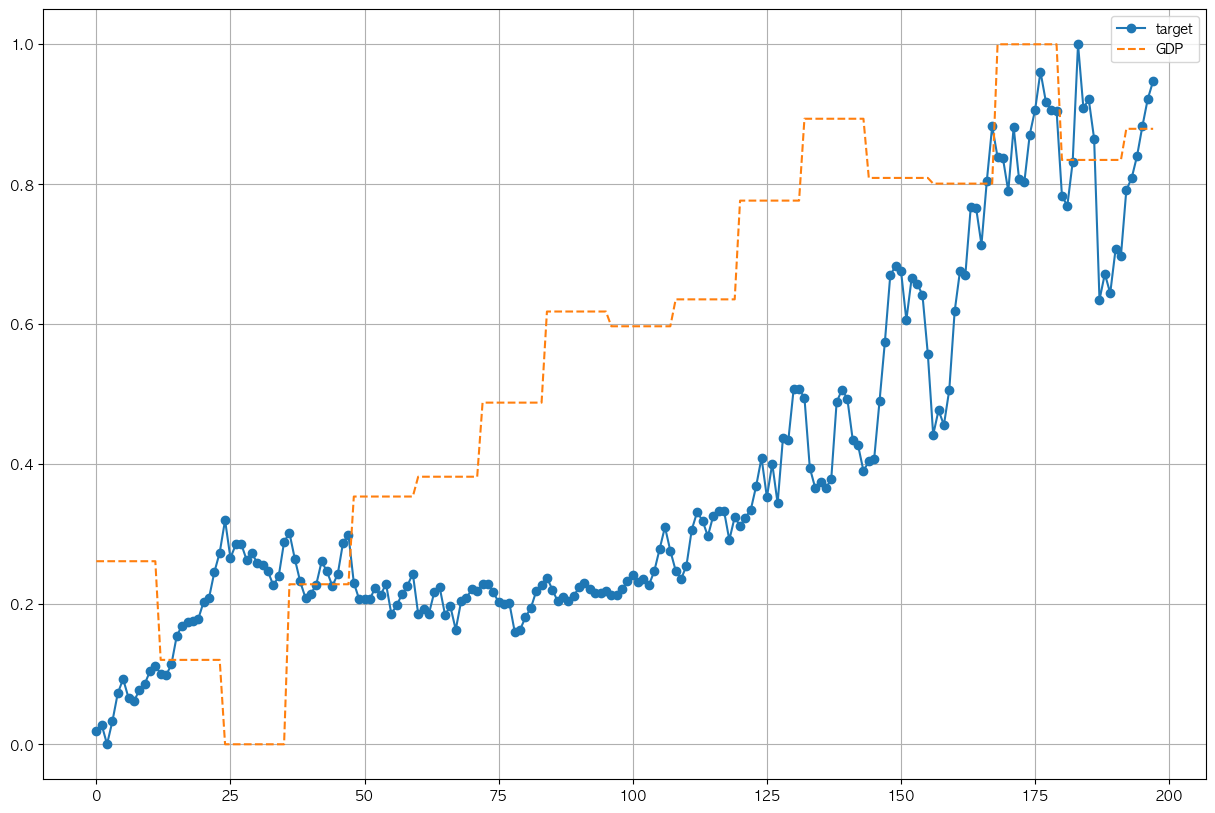

In [14]:
plt.figure(figsize=(15, 10))
target_df['target'].plot(linestyle='-', marker='o', label='target')
gdp_df['GDP'].plot(linestyle='--', label='GDP')
plt.legend()
plt.grid(True)
plt.show()

# 5. 기준금리

In [15]:
rate_df = pd.read_csv('../data/added_features/한국은행 기준금리 및 여수신금리_10155548.csv')

In [16]:
rate_df.drop(['통계표', '계정항목', '단위', '변환'], axis=1, inplace=True)
rate_df

,2001/01,2001/02,2001/03,2001/04,2001/05,2001/06,2001/07,2001/08,2001/09,2001/10,...,2023/09,2023/10,2023/11,2023/12,2024/01,2024/02,2024/03,2024/04,2024/05,2024/06
0,5.25,5.0,5.0,5.0,5.0,5.0,4.75,4.5,4.0,4.0,...,3.500,3.500,3.500,3.500,3.500,3.500,3.500,3.500,3.500,3.500
1,5.00,5.0,5.0,5.0,5.0,5.0,5.00,5.0,5.0,5.0,...,3.618,3.706,3.706,3.706,3.623,3.623,3.623,3.563,3.563,3.563


In [17]:
rate_df = rate_df.iloc[0]
rate_df

2001/01    5.25
2001/02    5.00
2001/03    5.00
2001/04    5.00
2001/05    5.00
           ... 
2024/02    3.50
2024/03    3.50
2024/04    3.50
2024/05    3.50
2024/06    3.50
Name: 0, Length: 282, dtype: float64

In [18]:
rate_df = pd.DataFrame(rate_df)
rate_df.reset_index(inplace=True)

rate_df.columns = ['년도월', '한국은행 기준금리']
rate_df

,년도월,한국은행 기준금리
0,2001/01,5.25
1,2001/02,5.00
2,2001/03,5.00
3,2001/04,5.00
4,2001/05,5.00
...,...,...
277,2024/02,3.50
278,2024/03,3.50
279,2024/04,3.50
280,2024/05,3.50


In [19]:
# yyyy/mm -> yyyymm

rate_df['년도월'] = rate_df['년도월'].str.replace('/', '').astype(int)
rate_df = rate_df.iloc[72:]

In [20]:
rate_scaler = MinMaxScaler()

rate_df['한국은행 기준금리'] = rate_scaler.fit_transform(rate_df[['한국은행 기준금리']])

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_14218/2113341033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_df['한국은행 기준금리'] = rate_scaler.fit_transform(rate_df[['한국은행 기준금리']])


In [21]:
rate_df.reset_index(drop=True, inplace=True)
rate_df

,년도월,한국은행 기준금리
0,200701,0.842105
1,200702,0.842105
2,200703,0.842105
3,200704,0.842105
4,200705,0.842105
...,...,...
205,202402,0.631579
206,202403,0.631579
207,202404,0.631579
208,202405,0.631579


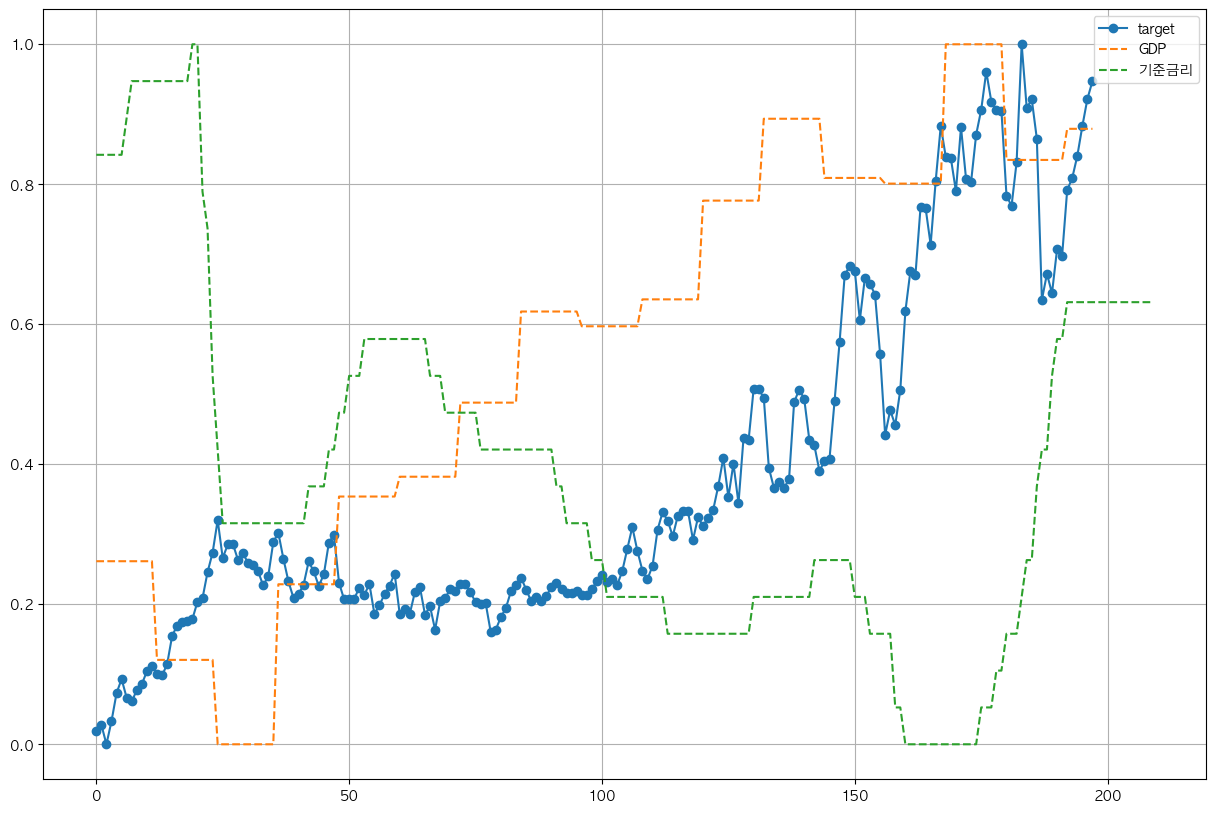

In [22]:
plt.figure(figsize=(15, 10))
target_df['target'].plot(linestyle='-', marker='o', label='target')
gdp_df['GDP'].plot(linestyle='--', label='GDP')
rate_df['한국은행 기준금리'].plot(linestyle='--', label='기준금리')
plt.legend()
plt.grid(True)
plt.show()

# 6. 인플레이션

In [23]:
inf_df = pd.read_csv('../data/added_features/기대인플레이션율(전국, 월)_10161008.csv')
inf_df.head()

,통계표,CSI코드,단위,변환,2002/02,2002/03,2002/04,2002/05,2002/06,2002/07,...,2023/09,2023/10,2023/11,2023/12,2024/01,2024/02,2024/03,2024/04,2024/05,2024/06
0,"6.2.3. 기대인플레이션율(전국, 월)",물가인식,%,원자료,NaN,NaN,NaN,NaN,NaN,NaN,...,4.1,4.1,4.1,3.9,3.8,3.8,3.8,3.8,3.8,3.7
1,"6.2.3. 기대인플레이션율(전국, 월)",< 0%,%,원자료,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2,0.2,0.3,0.3,0.2,0.3,0.2,0.2,0.3,0.2
2,"6.2.3. 기대인플레이션율(전국, 월)",0-1%,%,원자료,NaN,NaN,NaN,NaN,NaN,NaN,...,2.2,2.1,2.3,2.9,3.8,3.1,3.5,3.5,3.6,3.4
3,"6.2.3. 기대인플레이션율(전국, 월)",1-2%,%,원자료,NaN,NaN,NaN,NaN,NaN,NaN,...,7.5,8.0,7.6,8.2,8.1,9.1,8.1,8.8,8.3,8.8
4,"6.2.3. 기대인플레이션율(전국, 월)",2-3%,%,원자료,NaN,NaN,NaN,NaN,NaN,NaN,...,15.6,15.9,15.2,15.5,17.5,18.5,17.3,17.4,18.1,20.1


In [24]:
inf_df.drop(['통계표', '단위', '변환', 'CSI코드'], axis=1, inplace=True)

cols = inf_df.columns.tolist()
cols = [int(col.replace('/', '')) for col in cols]
inf_df.columns = cols

In [25]:
inflation_df = pd.DataFrame(inf_df.iloc[10])
inflation_df.columns = ['기대 인플레이션']
inflation_df

,기대 인플레이션
200202,4.4
200203,4.3
200204,4.3
200205,4.2
200206,4.4
...,...
202402,3.0
202403,3.2
202404,3.1
202405,3.2


In [26]:
inflation_df.reset_index(inplace=True)
inflation_df.columns = ['년월', '기대 인플레이션']
inflation_df

,년월,기대 인플레이션
0,200202,4.4
1,200203,4.3
2,200204,4.3
3,200205,4.2
4,200206,4.4
...,...,...
264,202402,3.0
265,202403,3.2
266,202404,3.1
267,202405,3.2


In [27]:
inflation_df = inflation_df.iloc[59:]
inflation_df

,년월,기대 인플레이션
59,200701,3.0
60,200702,2.9
61,200703,3.0
62,200704,2.9
63,200705,2.9
...,...,...
264,202402,3.0
265,202403,3.2
266,202404,3.1
267,202405,3.2


In [28]:
inflation_df.reset_index(drop=True, inplace=True)
inflation_df

,년월,기대 인플레이션
0,200701,3.0
1,200702,2.9
2,200703,3.0
3,200704,2.9
4,200705,2.9
...,...,...
205,202402,3.0
206,202403,3.2
207,202404,3.1
208,202405,3.2


In [29]:
inf_scaler = MinMaxScaler()
inflation_df['기대 인플레이션'] = inf_scaler.fit_transform(inflation_df[['기대 인플레이션']])
inflation_df

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_14218/2249206506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflation_df['기대 인플레이션'] = inf_scaler.fit_transform(inflation_df[['기대 인플레이션']])


,년월,기대 인플레이션
0,200701,0.451613
1,200702,0.419355
2,200703,0.451613
3,200704,0.419355
4,200705,0.419355
...,...,...
205,202402,0.451613
206,202403,0.516129
207,202404,0.483871
208,202405,0.516129


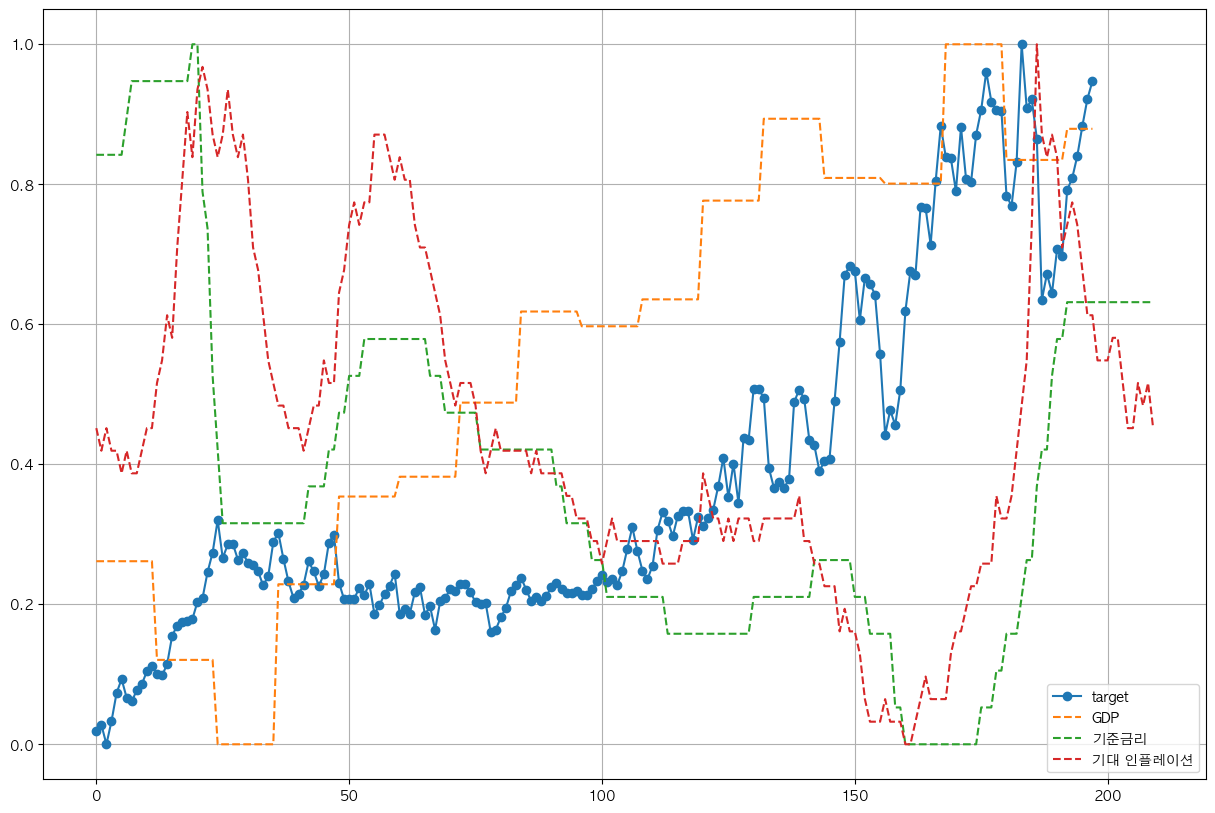

In [30]:
plt.figure(figsize=(15, 10))
target_df['target'].plot(linestyle='-', marker='o', label='target')
gdp_df['GDP'].plot(linestyle='--', label='GDP')
rate_df['한국은행 기준금리'].plot(linestyle='--', label='기준금리')
inflation_df['기대 인플레이션'].plot(linestyle='--', label='기대 인플레이션')
plt.legend()
plt.grid(True)
plt.show()

# 7. 지가지수 추가

In [31]:
land_cost_df = pd.read_excel('../data/added_features/지가현황.xlsx')

In [32]:
land_cost_df

,구분,'07.01,Unnamed: 2,'07.02,Unnamed: 4,'07.03,Unnamed: 6,'07.04,Unnamed: 8,'07.05,...,'24.01,Unnamed: 410,'24.02,Unnamed: 412,'24.03,Unnamed: 414,'24.04,Unnamed: 416,'24.05,Unnamed: 418
0,NaN,지가지수,변동률(전월대비),지가지수,변동률(전월대비),지가지수,변동률(전월대비),지가지수,변동률(전월대비),지가지수,...,지가지수,변동률(전월대비),지가지수,변동률(전월대비),지가지수,변동률(전월대비),지가지수,변동률(전월대비),지가지수,변동률(전월대비)
1,주거,62.906,0.52,63.208,0.48,63.462,0.4,63.676,0.34,63.886,...,100.151,0.15,100.306,0.16,100.521,0.21,100.753,0.23,100.99,0.24


In [33]:
drop_col = [f'Unnamed: {i}' for i in range(2, 420, 2)]
drop_col

['Unnamed: 2',
 'Unnamed: 4',
 'Unnamed: 6',
 'Unnamed: 8',
 'Unnamed: 10',
 'Unnamed: 12',
 'Unnamed: 14',
 'Unnamed: 16',
 'Unnamed: 18',
 'Unnamed: 20',
 'Unnamed: 22',
 'Unnamed: 24',
 'Unnamed: 26',
 'Unnamed: 28',
 'Unnamed: 30',
 'Unnamed: 32',
 'Unnamed: 34',
 'Unnamed: 36',
 'Unnamed: 38',
 'Unnamed: 40',
 'Unnamed: 42',
 'Unnamed: 44',
 'Unnamed: 46',
 'Unnamed: 48',
 'Unnamed: 50',
 'Unnamed: 52',
 'Unnamed: 54',
 'Unnamed: 56',
 'Unnamed: 58',
 'Unnamed: 60',
 'Unnamed: 62',
 'Unnamed: 64',
 'Unnamed: 66',
 'Unnamed: 68',
 'Unnamed: 70',
 'Unnamed: 72',
 'Unnamed: 74',
 'Unnamed: 76',
 'Unnamed: 78',
 'Unnamed: 80',
 'Unnamed: 82',
 'Unnamed: 84',
 'Unnamed: 86',
 'Unnamed: 88',
 'Unnamed: 90',
 'Unnamed: 92',
 'Unnamed: 94',
 'Unnamed: 96',
 'Unnamed: 98',
 'Unnamed: 100',
 'Unnamed: 102',
 'Unnamed: 104',
 'Unnamed: 106',
 'Unnamed: 108',
 'Unnamed: 110',
 'Unnamed: 112',
 'Unnamed: 114',
 'Unnamed: 116',
 'Unnamed: 118',
 'Unnamed: 120',
 'Unnamed: 122',
 'Unnamed: 124',

In [34]:
land_cost_df.drop(drop_col, axis=1, inplace=True)
land_cost_df.drop(['구분'], axis=1, inplace=True)

cols = land_cost_df.columns

cols = [col.replace('\'', '') for col in cols]
cols = [int('20'+col.replace('.', '')) for col in cols]

land_cost_df.columns = cols

In [35]:
land_value_df = pd.DataFrame(land_cost_df.iloc[1])
land_value_df.columns = ['지가지수']

land_value_df

,지가지수
200701,62.906
200702,63.208
200703,63.462
200704,63.676
200705,63.886
...,...
202401,100.151
202402,100.306
202403,100.521
202404,100.753


In [36]:
land_value_df.reset_index(inplace=True)
land_value_df.columns = ['년월', '지가지수']

### 스케일링

In [37]:
land_value_scaler = MinMaxScaler()

land_value_df['지가지수'] = land_value_scaler.fit_transform(land_value_df[['지가지수']])

### 시각화

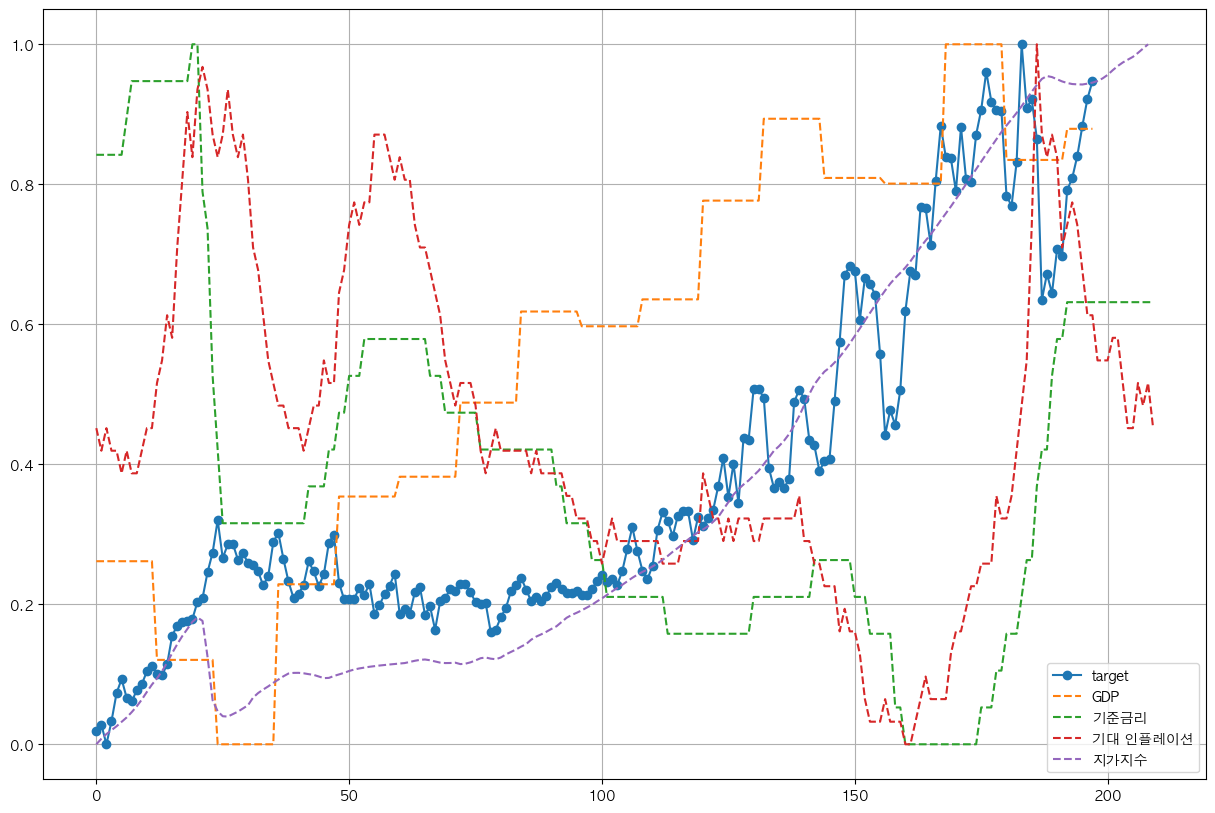

In [38]:
plt.figure(figsize=(15, 10))
target_df['target'].plot(linestyle='-', marker='o', label='target')
gdp_df['GDP'].plot(linestyle='--', label='GDP')
rate_df['한국은행 기준금리'].plot(linestyle='--', label='기준금리')
inflation_df['기대 인플레이션'].plot(linestyle='--', label='기대 인플레이션')
land_value_df['지가지수'].plot(linestyle='--', label='지가지수')
plt.legend()
plt.grid(True)
plt.show()

# 8. 아파트 인허가

In [39]:
const_consent_df = pd.read_csv('../data/added_features/주택유형별(아파트)_인허가.csv')

In [40]:
const_consent_df

,Year,아파트 인허가
0,2007,50028
1,2008,21938
2,2009,26626
3,2010,51370
4,2011,47107
5,2012,43002
6,2013,45104
7,2014,29009
8,2015,41351
9,2016,25226


In [41]:
const_consent_scaler = MinMaxScaler()

const_consent_df['아파트 인허가'] =const_consent_scaler.fit_transform(const_consent_df[['아파트 인허가']])

In [42]:
target_df_2 = df.groupby('계약년')[['target']].mean().reset_index()
target_df_2

,계약년,target
0,2007,31969.883574
1,2008,39559.710447
2,2009,50162.794165
3,2010,49571.817532
4,2011,45494.878488
5,2012,44379.360554
6,2013,44318.094953
7,2014,45831.005509
8,2015,47739.739964
9,2016,53448.494413


In [43]:
target_2_scaler = MinMaxScaler()
target_df_2['target'] = target_2_scaler.fit_transform(target_df_2[['target']])

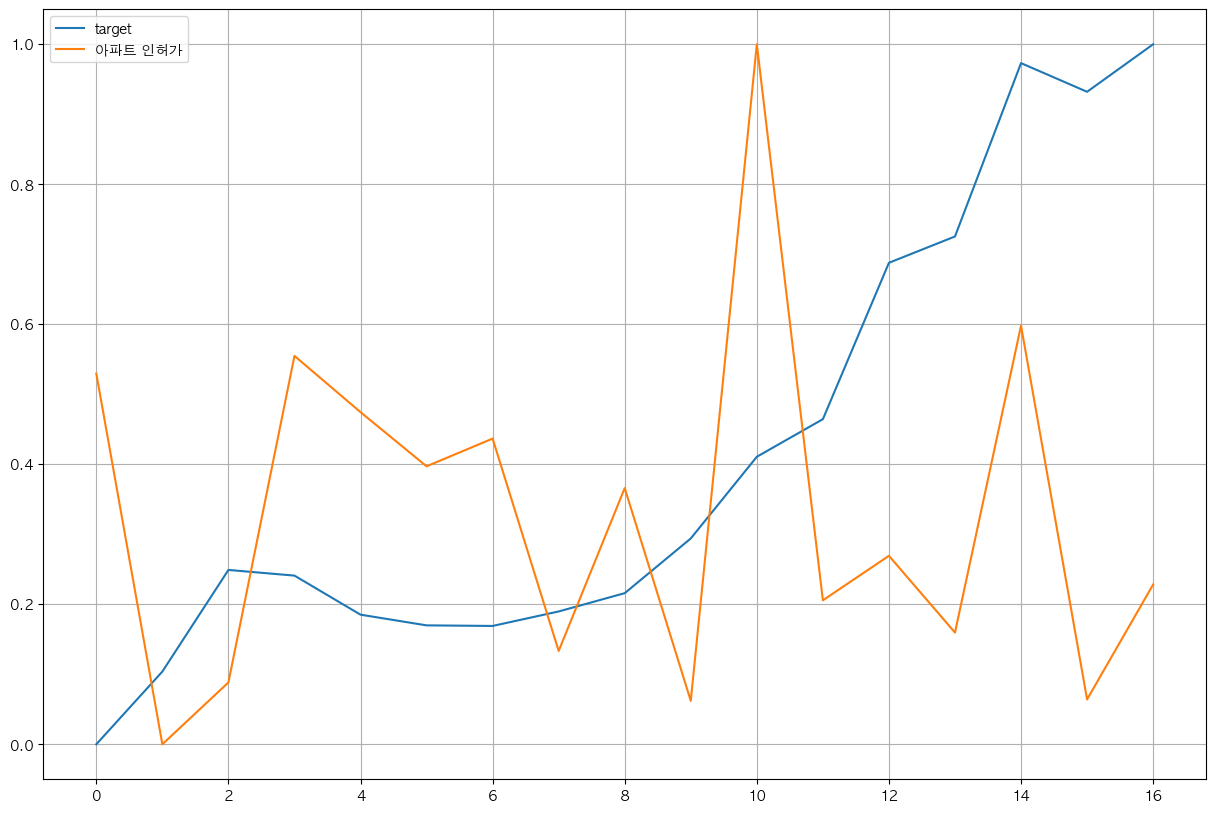

In [44]:
plt.figure(figsize=(15, 10))
target_df_2['target'].plot()
const_consent_df['아파트 인허가'].plot()
plt.legend()
plt.grid(True)
plt.show()

# 9. 미분양
- 미분양 feature는 제거 하는게 유리하다고 보인다.

In [45]:
unsold_house_df = pd.read_excel('../data/added_features/미분양 현황.xlsx')
unsold_house_df.drop(['구분'], axis=1, inplace=True)
cols = unsold_house_df.columns

cols = [col.replace('\'', '') for col in cols]
cols = [int('20'+col.replace('.', '')) for col in cols]

unsold_house_df.columns = cols

unsold_house_df = pd.DataFrame(unsold_house_df.iloc[0])
unsold_house_df.reset_index(inplace=True)
unsold_house_df.columns = ['년도월', '미분양']

In [46]:
unsold_house_df

,년도월,미분양
0,200701,697
1,200702,590.0
2,200703,687.0
3,200704,685.0
4,200705,704.0
...,...,...
204,202401,997.0
205,202402,1018.0
206,202403,968.0
207,202404,936.0


### 스케일링

In [47]:
unsold_scaler = MinMaxScaler()

unsold_house_df['미분양'] = unsold_scaler.fit_transform(unsold_house_df[['미분양']])

In [48]:
unsold_house_df

,년도월,미분양
0,200701,0.155669
1,200702,0.130809
2,200703,0.153346
3,200704,0.152881
4,200705,0.157296
...,...,...
204,202401,0.225372
205,202402,0.230251
206,202403,0.218634
207,202404,0.211199


### 시각화

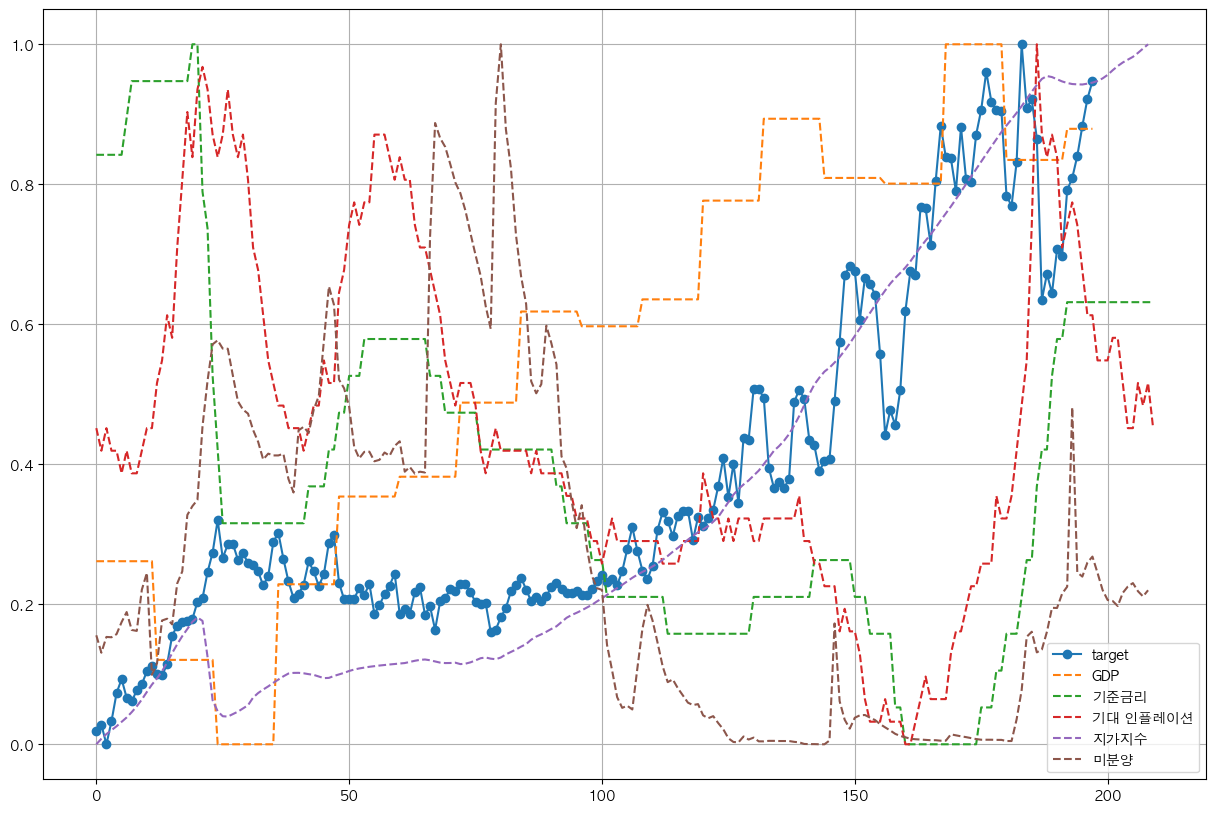

In [49]:
plt.figure(figsize=(15, 10))
target_df['target'].plot(linestyle='-', marker='o', label='target')
gdp_df['GDP'].plot(linestyle='--', label='GDP')
rate_df['한국은행 기준금리'].plot(linestyle='--', label='기준금리')
inflation_df['기대 인플레이션'].plot(linestyle='--', label='기대 인플레이션')
land_value_df['지가지수'].plot(linestyle='--', label='지가지수')
unsold_house_df['미분양'].plot(linestyle='--', label='미분양')
plt.legend()
plt.grid(True)
plt.show()

# 10. 거래량

In [50]:
volume_df = pd.read_excel('../data/added_features/주택매매거래량(거래량)-월별.xlsx')

In [51]:
volume_df.drop(['구분'], axis=1, inplace=True)
volume_df

,'07.01,'07.02,'07.03,'07.04,'07.05,'07.06,'07.07,'07.08,'07.09,'07.10,...,'23.08,'23.09,'23.10,'23.11,'23.12,'24.01,'24.02,'24.03,'24.04,'24.05
0,16826,12029,13487,14349,12552,10879,12243,12253,10706,15410,...,6716,6396,5442,4961,4073,4699,4795,6098,7898,8445
1,78794,65573,74493,77044,73749,65774,70405,68478,56938,82327,...,51578,49448,47799,45415,38036,43033,43491,52816,58215,57436
2,45930,36382,40679,42561,40295,36644,39082,37089,33669,46151,...,23277,22741,19791,18010,15083,17608,18916,22722,27124,27603
3,32864,29191,33814,34483,33454,29130,31323,31389,23269,36176,...,28301,26707,28008,27405,22953,25425,24575,30094,31091,29833


In [52]:
cols = volume_df.columns
cols = [col.replace('\'', '') for col in cols]
cols = [int('20'+col.replace('.', '')) for col in cols]
cols

[200701,
 200702,
 200703,
 200704,
 200705,
 200706,
 200707,
 200708,
 200709,
 200710,
 200711,
 200712,
 200801,
 200802,
 200803,
 200804,
 200805,
 200806,
 200807,
 200808,
 200809,
 200810,
 200811,
 200812,
 200901,
 200902,
 200903,
 200904,
 200905,
 200906,
 200907,
 200908,
 200909,
 200910,
 200911,
 200912,
 201001,
 201002,
 201003,
 201004,
 201005,
 201006,
 201007,
 201008,
 201009,
 201010,
 201011,
 201012,
 201101,
 201102,
 201103,
 201104,
 201105,
 201106,
 201107,
 201108,
 201109,
 201110,
 201111,
 201112,
 201201,
 201202,
 201203,
 201204,
 201205,
 201206,
 201207,
 201208,
 201209,
 201210,
 201211,
 201212,
 201301,
 201302,
 201303,
 201304,
 201305,
 201306,
 201307,
 201308,
 201309,
 201310,
 201311,
 201312,
 201401,
 201402,
 201403,
 201404,
 201405,
 201406,
 201407,
 201408,
 201409,
 201410,
 201411,
 201412,
 201501,
 201502,
 201503,
 201504,
 201505,
 201506,
 201507,
 201508,
 201509,
 201510,
 201511,
 201512,
 201601,
 201602,
 201603,
 

In [53]:
volume_df.columns = cols
volume_df

,200701,200702,200703,200704,200705,200706,200707,200708,200709,200710,...,202308,202309,202310,202311,202312,202401,202402,202403,202404,202405
0,16826,12029,13487,14349,12552,10879,12243,12253,10706,15410,...,6716,6396,5442,4961,4073,4699,4795,6098,7898,8445
1,78794,65573,74493,77044,73749,65774,70405,68478,56938,82327,...,51578,49448,47799,45415,38036,43033,43491,52816,58215,57436
2,45930,36382,40679,42561,40295,36644,39082,37089,33669,46151,...,23277,22741,19791,18010,15083,17608,18916,22722,27124,27603
3,32864,29191,33814,34483,33454,29130,31323,31389,23269,36176,...,28301,26707,28008,27405,22953,25425,24575,30094,31091,29833


In [54]:
volume_df = pd.DataFrame(volume_df.iloc[0])
volume_df.reset_index(inplace=True)
volume_df.columns = ['년도월', '거래량']
volume_df

,년도월,거래량
0,200701,16826
1,200702,12029
2,200703,13487
3,200704,14349
4,200705,12552
...,...,...
204,202401,4699
205,202402,4795
206,202403,6098
207,202404,7898


In [55]:
volume_scaler = MinMaxScaler()

volume_df['거래량'] = volume_scaler.fit_transform(volume_df[['거래량']])

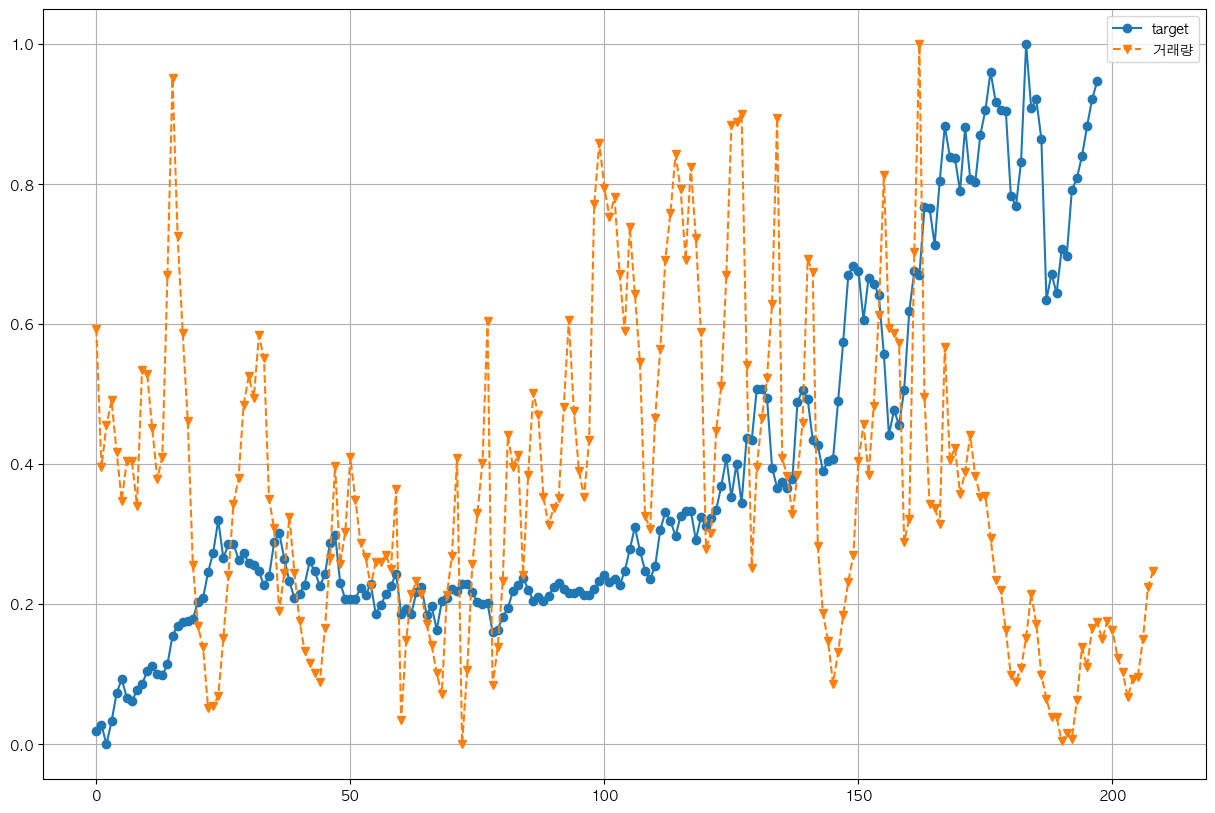

In [56]:
plt.figure(figsize=(15, 10))
target_df['target'].plot(linestyle='-', marker='o', label='target')
# gdp_df['GDP'].plot(linestyle='--', label='GDP')
# rate_df['한국은행 기준금리'].plot(linestyle='--', label='기준금리')
# inflation_df['기대 인플레이션'].plot(linestyle='--', label='기대 인플레이션')
# land_value_df['지가지수'].plot(linestyle='--', label='지가지수')
# unsold_house_df['미분양'].plot(linestyle='--', label='미분양')
volume_df['거래량'].plot(marker='v', linestyle='--', label='거래량')
plt.legend()
plt.grid(True)
plt.show()

# 15. 매수우위지수

In [57]:
pc_adv_df = pd.read_excel('../data/added_features/서울 월간 매수 우위 지수.xlsx')

In [58]:
pc_adv_df.drop(['조사항목'], axis=1, inplace=True)

In [59]:
cols = pc_adv_df.columns
cols = [str(col)[:10].replace('-', '')[:6] for col in cols]
cols

['200001',
 '200002',
 '200003',
 '200004',
 '200005',
 '200006',
 '200007',
 '200008',
 '200009',
 '200010',
 '200011',
 '200012',
 '200101',
 '200102',
 '200103',
 '200104',
 '200105',
 '200106',
 '200107',
 '200108',
 '200109',
 '200110',
 '200111',
 '200112',
 '200201',
 '200202',
 '200203',
 '200204',
 '200205',
 '200206',
 '200207',
 '200208',
 '200209',
 '200210',
 '200211',
 '200212',
 '200301',
 '200302',
 '200303',
 '200304',
 '200305',
 '200306',
 '200307',
 '200308',
 '200309',
 '200310',
 '200311',
 '200312',
 '200401',
 '200402',
 '200403',
 '200404',
 '200405',
 '200406',
 '200407',
 '200408',
 '200409',
 '200410',
 '200411',
 '200412',
 '200501',
 '200502',
 '200503',
 '200504',
 '200505',
 '200506',
 '200507',
 '200508',
 '200509',
 '200510',
 '200511',
 '200512',
 '200601',
 '200602',
 '200603',
 '200604',
 '200605',
 '200606',
 '200607',
 '200608',
 '200609',
 '200610',
 '200611',
 '200612',
 '200701',
 '200702',
 '200703',
 '200704',
 '200705',
 '200706',
 '200707',

In [60]:
pc_adv_df.columns = cols
pc_adv_df

,200001,200002,200003,200004,200005,200006,200007,200008,200009,200010,...,202309,202310,202311,202312,202401,202402,202403,202404,202405,202406
0,6.6,11.2,9.9,3.1,3.1,3.1,7.2,0.8,6.9,2.3,...,4.5,3.2,1.6,1.6,2.2,2.2,2.3,3.1,3.1,8.3
1,33.0,22.4,16.8,24.4,28.2,30.3,23.8,30.7,20.6,12.2,...,32.4,30.4,22.9,17.4,21.9,21.3,25.1,26.8,25.9,30.5
2,60.3,66.4,73.3,72.5,68.7,66.6,69.0,68.4,72.5,85.5,...,63.1,66.4,75.5,80.9,75.9,76.6,72.6,70.1,71.0,61.2
3,46.3,44.8,36.6,30.6,34.4,36.5,38.1,32.4,34.4,16.8,...,41.4,36.9,26.1,20.7,26.3,25.6,29.7,33.0,32.1,47.1


In [61]:
pc_adv_df = pd.DataFrame(pc_adv_df.iloc[3])
pc_adv_df.reset_index(inplace=True)
pc_adv_df.columns = ['년도월', '매수우위지수']
pc_adv_df

,년도월,매수우위지수
0,200001,46.3
1,200002,44.8
2,200003,36.6
3,200004,30.6
4,200005,34.4
...,...,...
289,202402,25.6
290,202403,29.7
291,202404,33.0
292,202405,32.1


In [62]:
pc_adv_df['년도월'] = pc_adv_df['년도월'].astype(int)

In [63]:
pc_adv_df = pc_adv_df.iloc[84:]
pc_adv_df

,년도월,매수우위지수
84,200701,83.3
85,200702,65.9
86,200703,65.5
87,200704,54.4
88,200705,49.2
...,...,...
289,202402,25.6
290,202403,29.7
291,202404,33.0
292,202405,32.1


In [64]:
pc_adv_df.reset_index(drop=True, inplace=True)
pc_adv_df

,년도월,매수우위지수
0,200701,83.3
1,200702,65.9
2,200703,65.5
3,200704,54.4
4,200705,49.2
...,...,...
205,202402,25.6
206,202403,29.7
207,202404,33.0
208,202405,32.1


In [65]:
pc_adv_scaler = MinMaxScaler()
pc_adv_df['매수우위지수'] = pc_adv_scaler.fit_transform(pc_adv_df[['매수우위지수']])

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_14218/1077618454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_adv_df['매수우위지수'] = pc_adv_scaler.fit_transform(pc_adv_df[['매수우위지수']])


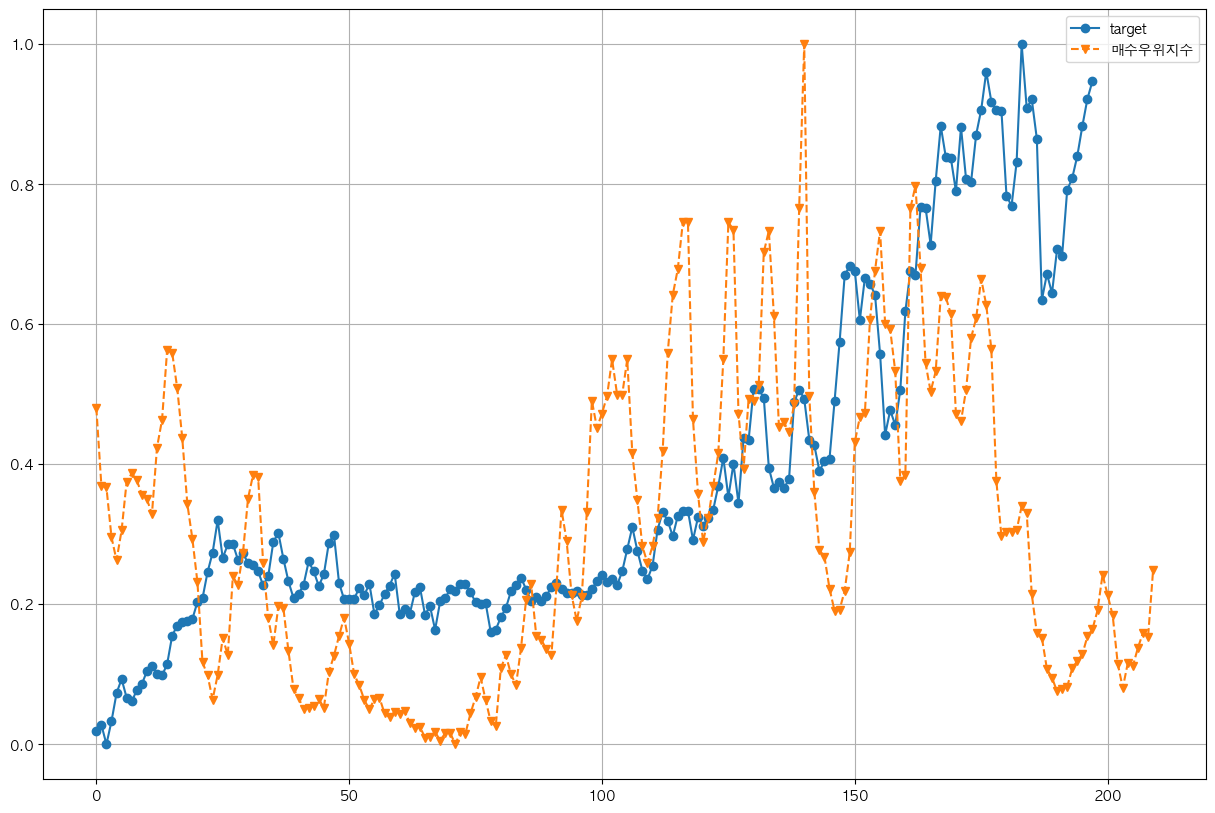

In [66]:
plt.figure(figsize=(15, 10))
target_df['target'].plot(linestyle='-', marker='o', label='target')
# gdp_df['GDP'].plot(linestyle='--', label='GDP')
# rate_df['한국은행 기준금리'].plot(linestyle='--', label='기준금리')
# inflation_df['기대 인플레이션'].plot(linestyle='--', label='기대 인플레이션')
# land_value_df['지가지수'].plot(linestyle='--', label='지가지수')
# unsold_house_df['미분양'].plot(linestyle='--', label='미분양')
# volume_df['거래량'].plot(marker='v', linestyle='--', label='거래량')
pc_adv_df['매수우위지수'].plot(marker='v', linestyle='--', label='매수우위지수')
plt.legend()
plt.grid(True)
plt.show()

# 17. 구매력지수

In [67]:
purchasing_power_df = pd.read_excel('../data/added_features/주택구매력지수.xlsx')

In [68]:
purchasing_power_df

,지역,구분,2008-12-01 09:00:52,2009-01-01 09:00:52,2009-02-01 09:00:52,2009-03-01 09:00:52,2009-04-01 09:00:52,2009-05-01 09:00:52,2009-06-01 09:00:52,2009-07-01 09:00:52,...,2023-06-01 09:00:52,2023-07-01 09:00:52,2023-08-01 09:00:52,2023-09-01 09:00:52,2023-10-01 09:00:52,2023-11-01 09:00:52,2023-12-01 09:00:52,2024-01-01 09:00:52,2024-02-01 09:00:52,2024-03-01 09:00:52
0,전국,종합,84.831524,93.909633,95.855916,95.516787,95.580559,95.627822,95.076965,97.088958,...,132.982834,138.693375,137.592306,137.120482,129.805277,130.693655,134.336374,139.605862,139.970866,140.214962
1,전국,아파트,81.540413,90.450718,92.330818,92.137825,92.055518,91.966487,91.287363,93.040537,...,113.462418,117.698506,117.395270,116.724986,110.245578,110.495544,113.575298,118.299273,118.879366,119.086680
2,전국,단독,77.822329,85.572601,87.208737,86.677383,86.797046,87.168412,87.092823,89.301052,...,142.154064,147.461347,147.081430,146.577067,138.757366,139.707010,143.600952,146.704465,147.088029,147.344537
3,전국,연립,138.521202,153.603005,157.368340,156.446873,158.258510,158.503621,157.777141,161.722632,...,249.846537,259.174488,258.506756,257.620299,243.876582,245.545655,260.276725,262.289802,262.975567,271.666490
4,서울,종합,43.993331,48.636971,49.385622,49.195857,48.985029,49.007324,48.626448,49.422085,...,58.892398,61.530634,61.372108,61.161654,57.898757,58.364993,60.063860,62.419929,62.733930,62.843332
5,서울,아파트,38.306520,42.427615,42.995620,42.877559,42.564523,42.446703,41.985733,42.528486,...,43.394399,45.212818,45.056635,44.744578,42.135745,42.276556,43.530602,45.238137,45.435569,45.594376
6,서울,단독,36.322950,39.902653,40.596043,40.347172,40.145284,40.420151,40.353039,41.275293,...,51.530848,53.454738,53.317018,53.134187,50.299545,50.643791,52.055345,54.097272,54.238711,54.333298
7,서울,연립,87.458865,96.992434,99.095860,98.609500,99.866350,100.315578,99.941215,102.103448,...,152.683995,158.384410,157.976351,157.434627,149.035689,150.055678,154.238059,160.288212,160.707291,160.987549
8,강북14개구,종합,53.544986,59.025559,60.294934,60.050275,60.068617,60.390301,59.962421,60.954092,...,65.784062,68.788939,68.796153,68.560241,64.902639,65.346827,67.349233,70.370435,70.554420,70.965940
9,강북14개구,아파트,48.902740,53.985879,55.311334,55.095329,55.555844,55.754781,55.087305,55.812531,...,49.568752,51.834898,52.016603,51.838231,49.072727,49.408577,50.889136,52.885317,53.023587,53.224455


In [69]:
purchasing_power_df.drop(['지역', '구분'], axis=1, inplace=True)
purchasing_power_df

,2008-12-01 09:00:52,2009-01-01 09:00:52,2009-02-01 09:00:52,2009-03-01 09:00:52,2009-04-01 09:00:52,2009-05-01 09:00:52,2009-06-01 09:00:52,2009-07-01 09:00:52,2009-08-01 09:00:52,2009-09-01 09:00:52,...,2023-06-01 09:00:52,2023-07-01 09:00:52,2023-08-01 09:00:52,2023-09-01 09:00:52,2023-10-01 09:00:52,2023-11-01 09:00:52,2023-12-01 09:00:52,2024-01-01 09:00:52,2024-02-01 09:00:52,2024-03-01 09:00:52
0,84.831524,93.909633,95.855916,95.516787,95.580559,95.627822,95.076965,97.088958,95.253128,91.702629,...,132.982834,138.693375,137.592306,137.120482,129.805277,130.693655,134.336374,139.605862,139.970866,140.214962
1,81.540413,90.450718,92.330818,92.137825,92.055518,91.966487,91.287363,93.040537,91.265590,87.731369,...,113.462418,117.698506,117.395270,116.724986,110.245578,110.495544,113.575298,118.299273,118.879366,119.086680
2,77.822329,85.572601,87.208737,86.677383,86.797046,87.168412,87.092823,89.301052,87.680588,84.749628,...,142.154064,147.461347,147.081430,146.577067,138.757366,139.707010,143.600952,146.704465,147.088029,147.344537
3,138.521202,153.603005,157.368340,156.446873,158.258510,158.503621,157.777141,161.722632,158.687025,152.669722,...,249.846537,259.174488,258.506756,257.620299,243.876582,245.545655,260.276725,262.289802,262.975567,271.666490
4,43.993331,48.636971,49.385622,49.195857,48.985029,49.007324,48.626448,49.422085,48.387883,46.361254,...,58.892398,61.530634,61.372108,61.161654,57.898757,58.364993,60.063860,62.419929,62.733930,62.843332
5,38.306520,42.427615,42.995620,42.877559,42.564523,42.446703,41.985733,42.528486,41.694497,39.889754,...,43.394399,45.212818,45.056635,44.744578,42.135745,42.276556,43.530602,45.238137,45.435569,45.594376
6,36.322950,39.902653,40.596043,40.347172,40.145284,40.420151,40.353039,41.275293,40.282488,38.711219,...,51.530848,53.454738,53.317018,53.134187,50.299545,50.643791,52.055345,54.097272,54.238711,54.333298
7,87.458865,96.992434,99.095860,98.609500,99.866350,100.315578,99.941215,102.103448,99.893682,95.879859,...,152.683995,158.384410,157.976351,157.434627,149.035689,150.055678,154.238059,160.288212,160.707291,160.987549
8,53.544986,59.025559,60.294934,60.050275,60.068617,60.390301,59.962421,60.954092,59.649031,57.380575,...,65.784062,68.788939,68.796153,68.560241,64.902639,65.346827,67.349233,70.370435,70.554420,70.965940
9,48.902740,53.985879,55.311334,55.095329,55.555844,55.754781,55.087305,55.812531,54.972160,52.893251,...,49.568752,51.834898,52.016603,51.838231,49.072727,49.408577,50.889136,52.885317,53.023587,53.224455


In [70]:
cols = purchasing_power_df.columns
cols = [str(col)[:10].replace('-', '')[:6] for col in cols]
cols

['200812',
 '200901',
 '200902',
 '200903',
 '200904',
 '200905',
 '200906',
 '200907',
 '200908',
 '200909',
 '200910',
 '200911',
 '200912',
 '201001',
 '201002',
 '201003',
 '201004',
 '201005',
 '201006',
 '201007',
 '201008',
 '201009',
 '201010',
 '201011',
 '201012',
 '201101',
 '201102',
 '201103',
 '201104',
 '201105',
 '201106',
 '201107',
 '201108',
 '201109',
 '201110',
 '201111',
 '201112',
 '201201',
 '201202',
 '201203',
 '201204',
 '201205',
 '201206',
 '201207',
 '201208',
 '201209',
 '201210',
 '201211',
 '201212',
 '201301',
 '201302',
 '201303',
 '201304',
 '201305',
 '201306',
 '201307',
 '201308',
 '201309',
 '201310',
 '201311',
 '201312',
 '201401',
 '201402',
 '201403',
 '201404',
 '201405',
 '201406',
 '201407',
 '201408',
 '201409',
 '201410',
 '201411',
 '201412',
 '201501',
 '201502',
 '201503',
 '201504',
 '201505',
 '201506',
 '201507',
 '201508',
 '201509',
 '201510',
 '201511',
 '201512',
 '201601',
 '201602',
 '201603',
 '201604',
 '201605',
 '201606',

In [71]:
purchasing_power_df.columns = cols
df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,건설사 랭킹,구,동,구별 지가지수,공시지가 평균,매수우위지수,건물나이,30년이상50년이하,구매력지수,거래활발지수
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,2.0,강남구,개포동,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,2.0,강남구,개포동,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,2.0,강남구,개포동,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,2.0,강남구,개포동,75.461,7.322618e+06,118.0,31,1,46.647899,27.764117
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,2.0,강남구,개포동,75.461,7.322618e+06,118.0,31,1,46.647899,27.764117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,1.0,중랑구,신내동,99.019,2.963517e+06,38.0,9,0,45.212818,12.462049
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,1.0,중랑구,신내동,99.019,2.963517e+06,38.0,9,0,45.212818,12.462049
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,1.0,중랑구,신내동,99.123,2.963517e+06,46.0,9,0,45.056635,13.703570
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,1.0,중랑구,신내동,99.328,2.963517e+06,41.4,9,0,44.744578,17.287617


In [72]:
pc_power_df = pd.DataFrame(purchasing_power_df.iloc[5])
pc_power_df.reset_index(inplace=True)
pc_power_df.columns = ['년도월', '구매력지수']
pc_power_df

,년도월,구매력지수
0,200812,38.306520
1,200901,42.427615
2,200902,42.995620
3,200903,42.877559
4,200904,42.564523
...,...,...
179,202311,42.276556
180,202312,43.530602
181,202401,45.238137
182,202402,45.435569


In [73]:
pc_power_df['년도월'] = pc_power_df['년도월'].astype(int)
pc_power_df

,년도월,구매력지수
0,200812,38.306520
1,200901,42.427615
2,200902,42.995620
3,200903,42.877559
4,200904,42.564523
...,...,...
179,202311,42.276556
180,202312,43.530602
181,202401,45.238137
182,202402,45.435569


In [74]:
pc_power_scaler = MinMaxScaler()
pc_power_df['구매력지수'] = pc_power_scaler.fit_transform(pc_power_df[['구매력지수']])

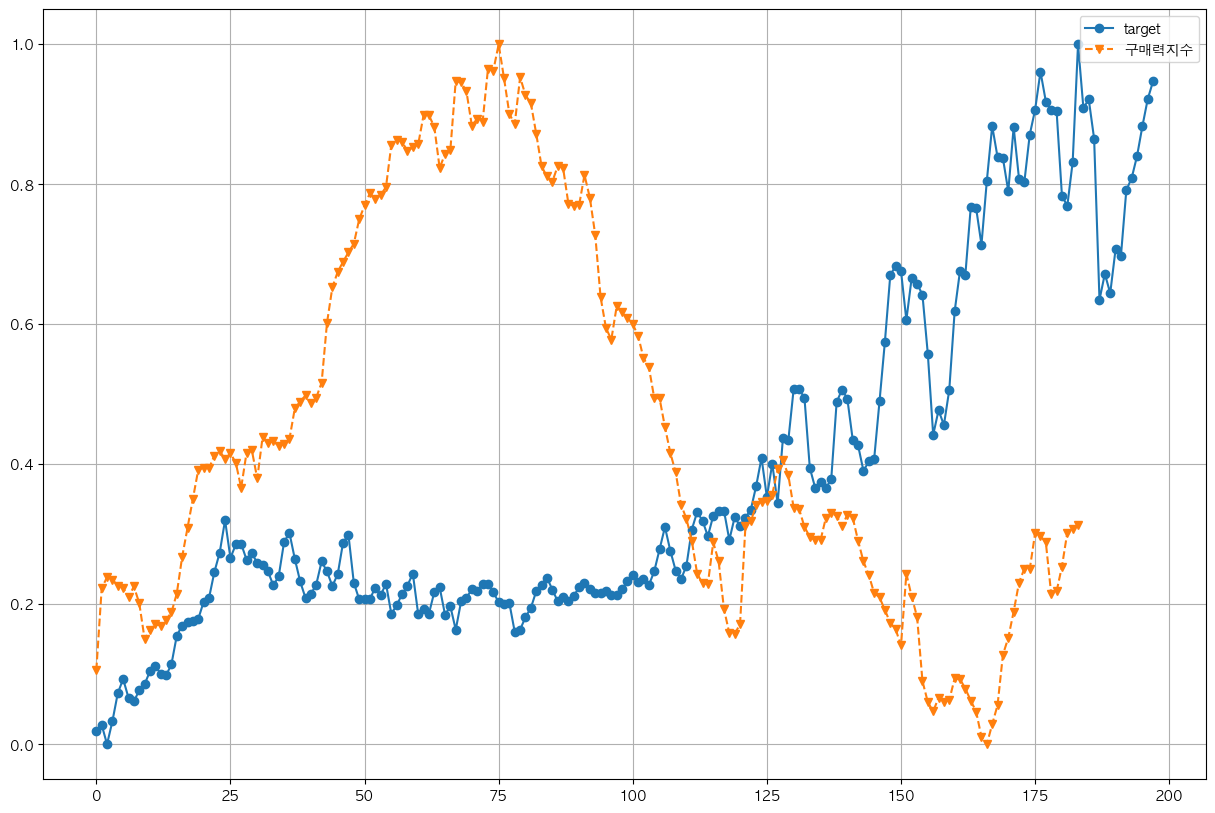

In [75]:
plt.figure(figsize=(15, 10))
target_df['target'].plot(linestyle='-', marker='o', label='target')
# gdp_df['GDP'].plot(linestyle='--', label='GDP')
# rate_df['한국은행 기준금리'].plot(linestyle='--', label='기준금리')
# inflation_df['기대 인플레이션'].plot(linestyle='--', label='기대 인플레이션')
# land_value_df['지가지수'].plot(linestyle='--', label='지가지수')
# unsold_house_df['미분양'].plot(linestyle='--', label='미분양')
# volume_df['거래량'].plot(marker='v', linestyle='--', label='거래량')
# pc_adv_df['매수우위지수'].plot(marker='v', linestyle='--', label='매수우위지수')
pc_power_df['구매력지수'].plot(marker='v', linestyle='--', label='구매력지수')
plt.legend()
plt.grid(True)
plt.show()

# 18. 거래활발지수
- 거래량과 상관관계가 있어보인다.

In [76]:
ta_df = pd.read_excel('../data/added_features/월간 매매거래활발지수.xlsx')

In [77]:
ta_df.drop(['지역', '구분'], axis=1, inplace=True)

In [78]:
cols = ta_df.columns
cols = [int(str(col)[:10].replace('-', '')[:6]) for col in cols]
cols

[200307,
 200308,
 200309,
 200310,
 200311,
 200312,
 200401,
 200402,
 200403,
 200404,
 200405,
 200406,
 200407,
 200408,
 200409,
 200410,
 200411,
 200412,
 200501,
 200502,
 200503,
 200504,
 200505,
 200506,
 200507,
 200508,
 200509,
 200510,
 200511,
 200512,
 200601,
 200602,
 200603,
 200604,
 200605,
 200606,
 200607,
 200608,
 200609,
 200610,
 200611,
 200612,
 200701,
 200702,
 200703,
 200704,
 200705,
 200706,
 200707,
 200708,
 200709,
 200710,
 200711,
 200712,
 200801,
 200802,
 200803,
 200804,
 200805,
 200806,
 200807,
 200808,
 200809,
 200810,
 200811,
 200812,
 200901,
 200902,
 200903,
 200904,
 200905,
 200906,
 200907,
 200908,
 200909,
 200910,
 200911,
 200912,
 201001,
 201002,
 201003,
 201004,
 201005,
 201006,
 201007,
 201008,
 201009,
 201010,
 201011,
 201012,
 201101,
 201102,
 201103,
 201104,
 201105,
 201106,
 201107,
 201108,
 201109,
 201110,
 201111,
 201112,
 201201,
 201202,
 201203,
 201204,
 201205,
 201206,
 201207,
 201208,
 201209,
 

In [79]:
ta_df.columns = cols

In [80]:
ta_df = pd.DataFrame(ta_df.iloc[7])
ta_df.reset_index(inplace=True)
ta_df.columns = ['년도월', '거래활발지수']
ta_df

,년도월,거래활발지수
0,200307,14.182769
1,200308,24.90485
2,200309,34.654885
3,200310,20.834993
4,200311,2.489521
...,...,...
247,202402,5.174386
248,202403,7.737224
249,202404,14.10659
250,202405,14.477103


In [83]:
ta_df = ta_df.iloc[42:]

In [85]:
ta_df.reset_index(drop=True, inplace=True)
ta_df

,년도월,거래활발지수
0,200701,13.124641
1,200702,5.622157
2,200703,6.61833
3,200704,8.627288
4,200705,4.478921
...,...,...
205,202402,5.174386
206,202403,7.737224
207,202404,14.10659
208,202405,14.477103


In [100]:
ta_df.iloc[50:]

,년도월,거래활발지수
50,201103,0.211157
51,201104,0.094933
52,201105,0.048614
53,201106,0.054881
54,201107,0.042521
...,...,...
205,202402,0.073503
206,202403,0.113564
207,202404,0.213127
208,202405,0.218919


In [87]:
ta_scaler = MinMaxScaler()

ta_df['거래활발지수'] = ta_scaler.fit_transform(ta_df[['거래활발지수']])

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_14218/862277253.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ta_df['거래활발지수'] = ta_scaler.fit_transform(ta_df[['거래활발지수']])


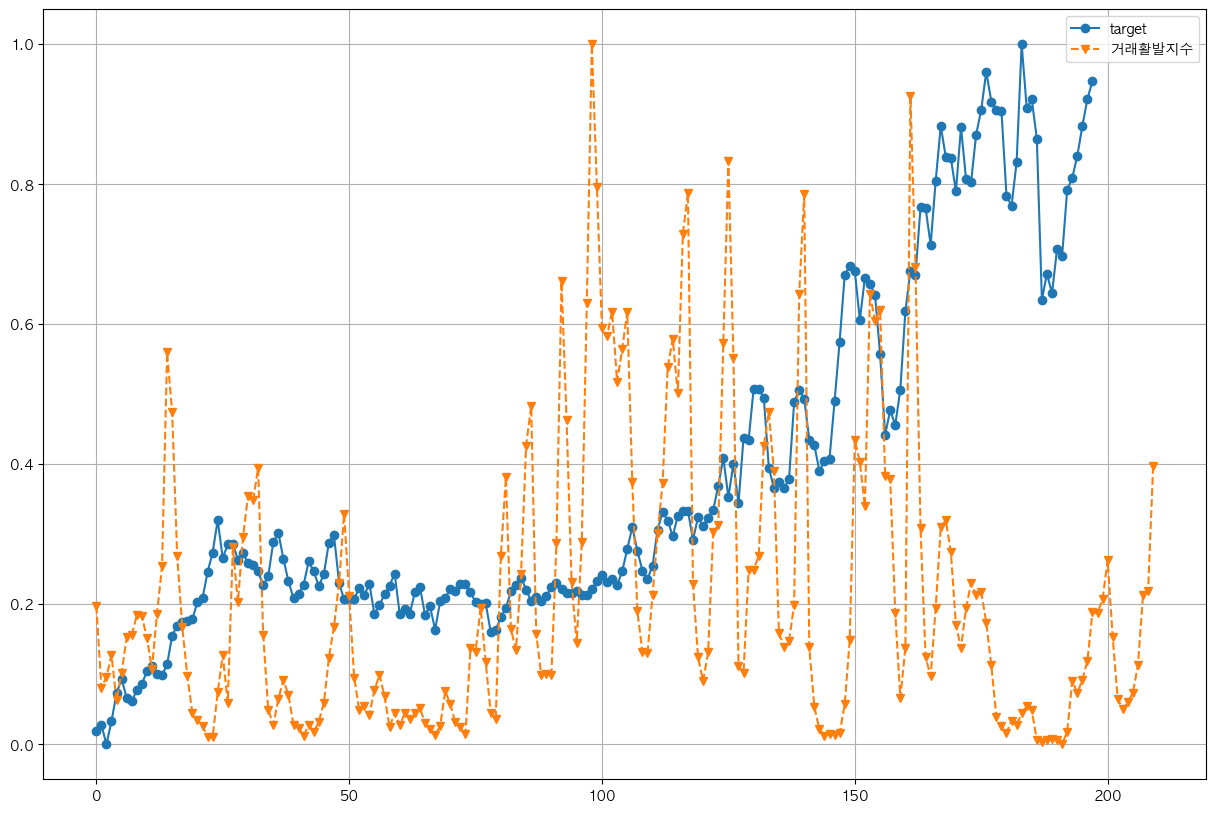

In [99]:
plt.figure(figsize=(15, 10))
target_df['target'].plot(linestyle='-', marker='o', label='target')
#gdp_df['GDP'].plot(linestyle='--', label='GDP')
#rate_df['한국은행 기준금리'].plot(linestyle='--', label='기준금리')
#inflation_df['기대 인플레이션'].plot(linestyle='--', label='기대 인플레이션')
#land_value_df['지가지수'].plot(linestyle='--', label='지가지수')
#unsold_house_df['미분양'].plot(linestyle='--', label='미분양')
#volume_df['거래량'].plot(linestyle='--', label='거래량')
#pc_adv_df['매수우위지수'].plot(linestyle='--', label='매수우위지수')
#pc_power_df['구매력지수'].plot(linestyle='--', label='구매력지수')
ta_df['거래활발지수'].plot(marker='v', linestyle='--', label='거래활발지수')
plt.legend()
plt.grid(True)
plt.show()

# 19. 매매가격 지수 증감률

In [119]:
df = pd.read_csv('../data/preprocessed/19_rate_trading_price.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_14218/1132975918.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/preprocessed/19_rate_trading_price.csv')


In [120]:
tmp = df[df['구'] == '강남구']
tmp

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,구,동,구별 지가지수,공시지가 평균,매수우위지수,건물나이,30년이상50년이하,구매력지수,거래활발지수,매매가격 지수 증감률
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,강남구,개포동,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,강남구,개포동,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,강남구,개포동,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,강남구,개포동,75.461,7.322618e+06,118.0,31,1,46.647899,27.764117,2.459291
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,강남구,개포동,75.461,7.322618e+06,118.0,31,1,46.647899,27.764117,2.459291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123928,서울특별시 강남구 일원동,742,742.0,0.0,디에이치포레센트,84.94,202308,12,7,2021,...,강남구,일원동,98.962,1.168175e+07,46.0,2,0,45.056635,13.703570,0.535049
1123929,서울특별시 강남구 일원동,742,742.0,0.0,디에이치포레센트,84.94,202308,19,6,2021,...,강남구,일원동,98.962,1.168175e+07,46.0,2,0,45.056635,13.703570,0.535049
1123930,서울특별시 강남구 일원동,742,742.0,0.0,디에이치포레센트,84.94,202308,31,9,2021,...,강남구,일원동,98.962,1.168175e+07,46.0,2,0,45.056635,13.703570,0.535049
1123931,서울특별시 강남구 일원동,734,734.0,0.0,상록수,74.54,202307,7,3,1993,...,강남구,일원동,98.705,1.168175e+07,38.0,30,1,45.212818,12.462049,0.378731


In [121]:
tmp = tmp.groupby('계약년월')[['target', '매매가격 지수 증감률']].mean()
tmp

,target,매매가격 지수 증감률
계약년월,,
200701,60014.643979,0.834969
200702,61114.664557,-0.155724
200703,56418.932692,-0.187928
200704,67416.182390,-0.868107
200705,71905.342593,-0.724114
...,...,...
202305,212485.223881,-0.159063
202306,228195.692884,0.293232
202307,NaN,0.378731


In [122]:
tmp.reset_index(inplace=True)
tmp = tmp.iloc[:198]

In [123]:
tmp

,계약년월,target,매매가격 지수 증감률
0,200701,60014.643979,0.834969
1,200702,61114.664557,-0.155724
2,200703,56418.932692,-0.187928
3,200704,67416.182390,-0.868107
4,200705,71905.342593,-0.724114
...,...,...,...
193,202302,176959.381443,-1.250734
194,202303,207304.232804,-0.365641
195,202304,224626.050000,-0.609934
196,202305,212485.223881,-0.159063


In [125]:
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

tmp['target'] = scaler1.fit_transform(tmp[['target']])
tmp['매매가격 지수 증감률'] = scaler2.fit_transform(tmp[['매매가격 지수 증감률']])

tmp

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_14218/1425609773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['target'] = scaler1.fit_transform(tmp[['target']])
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_14218/1425609773.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['매매가격 지수 증감률'] = scaler2.fit_transform(tmp[['매매가격 지수 증감률']])


,계약년월,target,매매가격 지수 증감률
0,200701,0.017574,0.677703
1,200702,0.022951,0.536529
2,200703,0.000000,0.531940
3,200704,0.053750,0.435015
4,200705,0.075692,0.455534
...,...,...,...
193,202302,0.589155,0.380490
194,202303,0.737469,0.506616
195,202304,0.822131,0.471804
196,202305,0.762791,0.536053


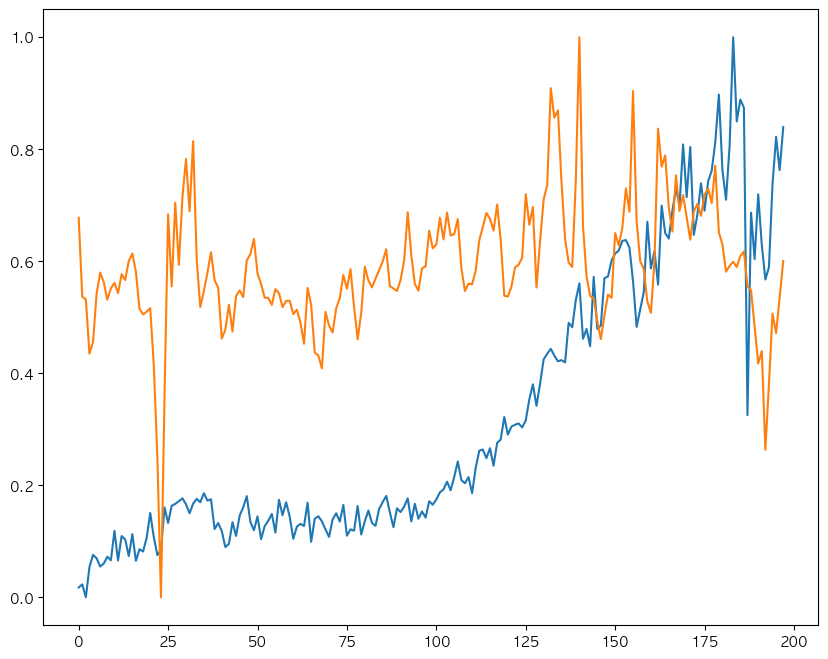

In [126]:
plt.figure(figsize=(10, 8))
tmp['target'].plot()
tmp['매매가격 지수 증감률'].plot()
plt.show()

# 계약년에 따른 target

In [3]:
df = pd.read_csv('../data/preprocessed/15_buy_advantage.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_85828/1589900297.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/preprocessed/15_buy_advantage.csv')


In [8]:
tmp = df[df['is_test']==0][['계약년', 'target']]
tmp

,계약년,target
0,2017,124000.0
1,2017,123500.0
2,2017,91500.0
3,2018,130000.0
4,2018,117000.0
...,...,...
1118817,2007,20000.0
1118818,2007,20000.0
1118819,2007,28000.0
1118820,2007,29000.0


In [10]:
target_df = tmp.groupby('계약년')['target'].mean()

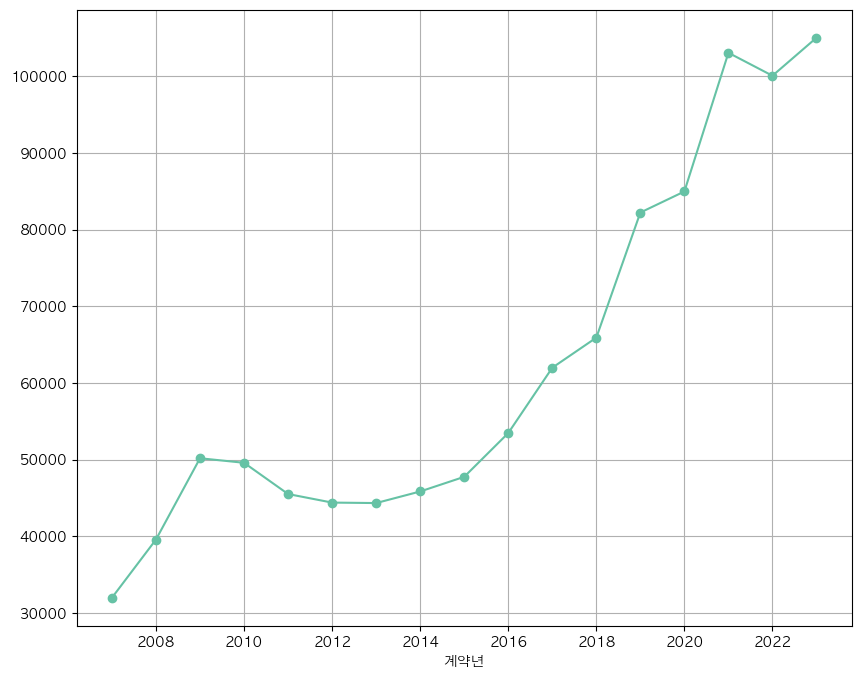

In [11]:
plt.figure(figsize=(10, 8))
target_df.plot(kind='line', marker='o', linestyle='-', colormap='Set2')
plt.grid(True)
plt.show()

# 흠..

In [2]:
df = pd.read_csv('../data/preprocessed/16_over_30_under_50_years.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_87981/1231300638.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/preprocessed/16_over_30_under_50_years.csv')


In [3]:
df.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60이하)',
       'k-전용면적별세대현황(60~85이하)', 'k-85~135이하', 'k-135초과', 'k-홈페이지', 'k-등록일자',
       'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수',
       '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y',
       '단지신청일', 'target', 'is_test', '시군구 번지', '좌표X,좌표Y', '가장 가까운 거리', 'index',
       '역사_ID', '역사명', '호선', '위도', '경도', '인근 지하철 역 개수', '가장 가까운 버스 정류장 거리',
       '가장 가까운 버스 정류장 index', '가장 가까운 버스 정류장 노드 ID', '가장 가까운 버스 정류소번호',
       '가장 가까운 버스 정류소명', '가장 가까운 버스 정류소 타입', '가장 가까운 버스 정류장 X좌표',
       '가장 가까운 버스 정류장 Y좌표', '인근 버스 정류장 개수', '계약년', '계약월', 'GDP', '한국은행 기준금리',
       '기대 인플레이션', '지가지수', '아파트

In [12]:
df[['사용허가여부']].isna().sum()

사용허가여부    876125
dtype: int64

# 상관관계

In [127]:
df = pd.read_csv('../data/preprocessed/20_ratio_sale_deposit.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_14218/198579563.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/preprocessed/20_ratio_sale_deposit.csv')


In [128]:
df.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60이하)',
       'k-전용면적별세대현황(60~85이하)', 'k-85~135이하', 'k-135초과', 'k-홈페이지', 'k-등록일자',
       'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수',
       '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y',
       '단지신청일', 'target', 'is_test', '시군구 번지', '좌표X,좌표Y', '가장 가까운 거리', 'index',
       '역사_ID', '역사명', '호선', '위도', '경도', '인근 지하철 역 개수', '가장 가까운 버스 정류장 거리',
       '가장 가까운 버스 정류장 index', '가장 가까운 버스 정류장 노드 ID', '가장 가까운 버스 정류소번호',
       '가장 가까운 버스 정류소명', '가장 가까운 버스 정류소 타입', '가장 가까운 버스 정류장 X좌표',
       '가장 가까운 버스 정류장 Y좌표', '인근 버스 정류장 개수', '계약년', '계약월', 'GDP', '한국은행 기준금리',
       '기대 인플레이션', '지가지수', '아파트

In [134]:
tmp = df[['target', '전용면적', '층', '건축년도', '좌표X', '좌표Y', '가장 가까운 거리', '인근 지하철 역 개수', '가장 가까운 버스 정류장 거리', '인근 버스 정류장 개수', '계약년', 'GDP', '한국은행 기준금리', '기대 인플레이션', '거래량', '구별 지가지수', '공시지가 평균', '매수우위지수', '30년이상50년이하', '거래활발지수', '매매가격 지수 증감률', '매매 대비 전세가격 비율']]
tmp

,target,전용면적,층,건축년도,좌표X,좌표Y,가장 가까운 거리,인근 지하철 역 개수,가장 가까운 버스 정류장 거리,인근 버스 정류장 개수,...,한국은행 기준금리,기대 인플레이션,거래량,구별 지가지수,공시지가 평균,매수우위지수,30년이상50년이하,거래활발지수,매매가격 지수 증감률,매매 대비 전세가격 비율
0,124000.0,79.97,3,1987,127.05721,37.476763,1127.738351,2.0,61.89584,7.0,...,1.5,2.5,13740.0,75.121,6.858562e+06,88.4,1,17.693929,1.243615,70.059000
1,123500.0,79.97,4,1987,127.05721,37.476763,1127.738351,2.0,61.89584,7.0,...,1.5,2.5,13740.0,75.121,6.858562e+06,88.4,1,17.693929,1.243615,70.059000
2,91500.0,54.98,5,1987,127.05721,37.476763,1127.738351,2.0,61.89584,7.0,...,1.5,2.5,13740.0,75.121,6.858562e+06,88.4,1,17.693929,1.243615,70.059000
3,130000.0,79.97,4,1987,127.05721,37.476763,1127.738351,2.0,61.89584,7.0,...,1.5,2.6,15107.0,75.461,7.322618e+06,118.0,1,27.764117,2.459291,69.322000
4,117000.0,79.97,2,1987,127.05721,37.476763,1127.738351,2.0,61.89584,7.0,...,1.5,2.6,15107.0,75.461,7.322618e+06,118.0,1,27.764117,2.459291,69.322000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,NaN,84.65,13,2014,127.10672,37.618870,732.482898,4.0,59.47567,7.0,...,3.5,3.3,6081.0,99.019,2.963517e+06,38.0,0,12.462049,-0.641286,50.938744
1128090,NaN,84.62,12,2014,127.10672,37.618870,732.482898,4.0,59.47567,7.0,...,3.5,3.3,6081.0,99.019,2.963517e+06,38.0,0,12.462049,-0.641286,50.938744
1128091,NaN,101.65,12,2014,127.10672,37.618870,732.482898,4.0,59.47567,7.0,...,3.5,3.3,6716.0,99.123,2.963517e+06,46.0,0,13.703570,-0.607676,50.991003
1128092,NaN,84.94,18,2014,127.10672,37.618870,732.482898,4.0,59.47567,7.0,...,3.5,3.3,6396.0,99.328,2.963517e+06,41.4,0,17.287617,-0.225827,51.082553


In [135]:
corr_matrix = tmp.corr()
corr_matrix

,target,전용면적,층,건축년도,좌표X,좌표Y,가장 가까운 거리,인근 지하철 역 개수,가장 가까운 버스 정류장 거리,인근 버스 정류장 개수,...,한국은행 기준금리,기대 인플레이션,거래량,구별 지가지수,공시지가 평균,매수우위지수,30년이상50년이하,거래활발지수,매매가격 지수 증감률,매매 대비 전세가격 비율
target,1.000000,0.577041,0.153176,0.056041,0.101851,-0.298422,-0.113268,0.198457,0.168845,-0.171070,...,-0.251248,-0.199515,-0.017443,0.240285,0.615316,0.172166,0.201736,0.039439,0.103446,0.051932
전용면적,0.577041,1.000000,0.103204,0.076168,-0.004787,-0.147214,0.014895,0.057874,0.077817,-0.097830,...,-0.055452,-0.017610,0.023852,-0.056498,0.175835,0.016611,0.007362,0.030638,-0.000774,0.054950
층,0.153176,0.103204,1.000000,0.191310,0.015862,-0.044652,-0.073433,0.077114,-0.048844,0.035659,...,-0.032936,-0.024871,-0.002682,0.036710,0.052221,0.013359,-0.135669,0.009047,-0.004364,0.027009
건축년도,0.056041,0.076168,0.191310,1.000000,-0.119026,-0.049162,0.035318,0.039325,-0.110389,0.078454,...,-0.088970,-0.093054,0.003850,0.172401,0.041564,0.063016,-0.572122,0.021516,0.008069,0.068687
좌표X,0.101851,-0.004787,0.015862,-0.119026,1.000000,0.253947,-0.115938,0.102552,0.090994,-0.111403,...,0.012776,0.023401,-0.019197,-0.029030,0.198277,-0.022168,0.094813,-0.008366,0.014846,-0.014848
좌표Y,-0.298422,-0.147214,-0.044652,-0.049162,0.253947,1.000000,-0.015989,-0.110881,-0.073253,0.160504,...,0.035794,-0.015206,0.019600,0.189574,-0.450994,0.023550,-0.069566,0.008959,0.061324,-0.016973
가장 가까운 거리,-0.113268,0.014895,-0.073433,0.035318,-0.115938,-0.015989,1.000000,-0.469908,-0.020867,-0.043500,...,0.006887,-0.005051,0.011310,0.050906,-0.121071,0.011091,-0.034168,0.004484,0.016004,-0.004460
인근 지하철 역 개수,0.198457,0.057874,0.077114,0.039325,0.102552,-0.110881,-0.469908,1.000000,-0.014631,0.067210,...,-0.021978,-0.000311,-0.010486,-0.093780,0.378572,-0.006361,0.038350,-0.000810,-0.021572,0.013451
가장 가까운 버스 정류장 거리,0.168845,0.077817,-0.048844,-0.110389,0.090994,-0.073253,-0.020867,-0.014631,1.000000,-0.472314,...,-0.000553,0.018824,-0.009691,-0.053369,0.112279,-0.019466,0.119518,-0.003362,-0.019501,-0.000033
인근 버스 정류장 개수,-0.171070,-0.097830,0.035659,0.078454,-0.111403,0.160504,-0.043500,0.067210,-0.472314,1.000000,...,0.000023,-0.021085,0.012052,0.083732,-0.181512,0.020880,-0.090833,0.008963,0.016617,0.002909


<Axes: >

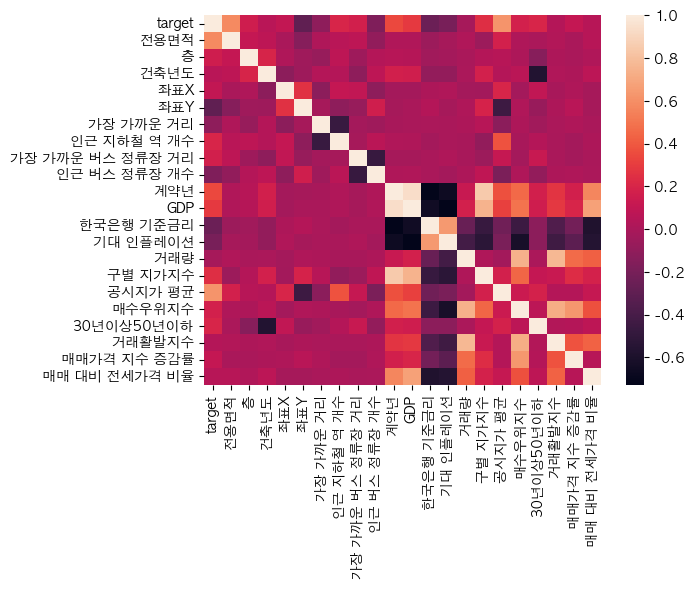

In [136]:
sns.heatmap(corr_matrix)

In [148]:
corr_matrix['target'].sort_values(ascending=False)

target              1.000000
공시지가 평균             0.615316
전용면적                0.577041
계약년                 0.344328
GDP                 0.288095
구별 지가지수             0.240285
30년이상50년이하          0.201736
인근 지하철 역 개수         0.198457
매수우위지수              0.172166
가장 가까운 버스 정류장 거리    0.168845
층                   0.153176
매매가격 지수 증감률         0.103446
좌표X                 0.101851
건축년도                0.056041
매매 대비 전세가격 비율       0.051932
거래활발지수              0.039439
거래량                -0.017443
가장 가까운 거리          -0.113268
인근 버스 정류장 개수       -0.171070
기대 인플레이션           -0.199515
한국은행 기준금리          -0.251248
좌표Y                -0.298422
Name: target, dtype: float64